# Day7/ TEST 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_id = r'C:\Users\Omar_Atif\Desktop\jupyter python\datasets_11657_16098_train.csv'

In [5]:
url = file_id

In [6]:
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
#  dimensions of your DataFrame 
data.shape

(891, 12)

In [11]:
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [13]:
data['Has_Cabin'] = data['Cabin'].notna().astype(int)
data = data.drop('Cabin', axis=1)

In [16]:
data['Embarked'] = data['Embarked'].fillna('S')

In [17]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


In [18]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [24]:
print("Missing values after cleaning:")
print(data.isnull().sum())
print("\nCleaned Data Shape:", data.shape)
print(data.dtypes)

Missing values after cleaning:
Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Has_Cabin    0
dtype: int64

Cleaned Data Shape: (891, 9)
Survived       int64
Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Has_Cabin      int64
dtype: object


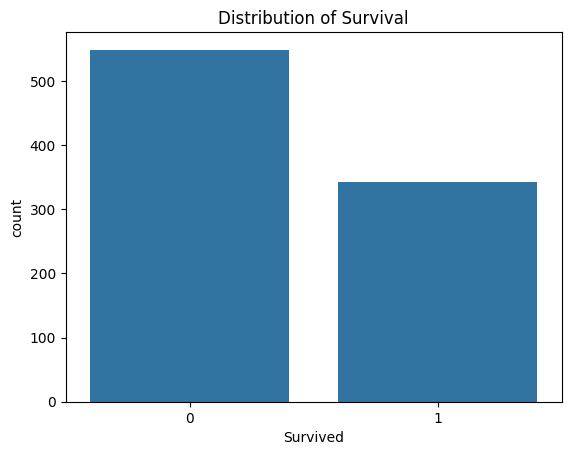

In [26]:
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.show()

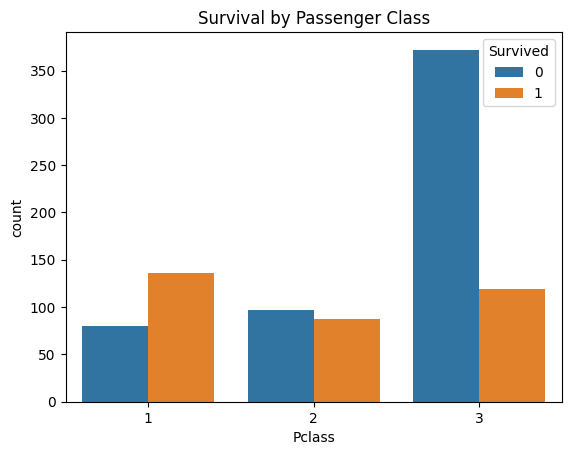

In [28]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

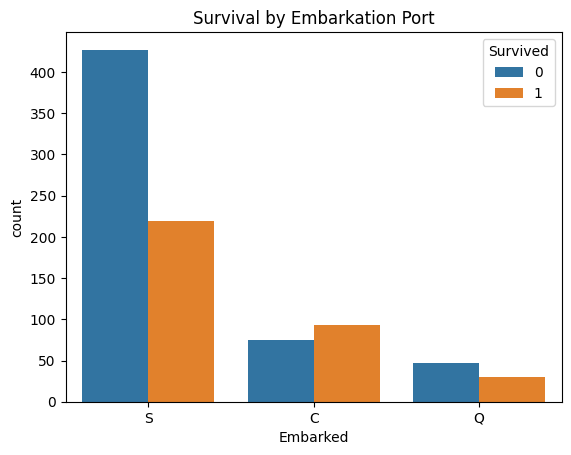

In [64]:
# num in all type 
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival by Embarkation Port')
plt.show()

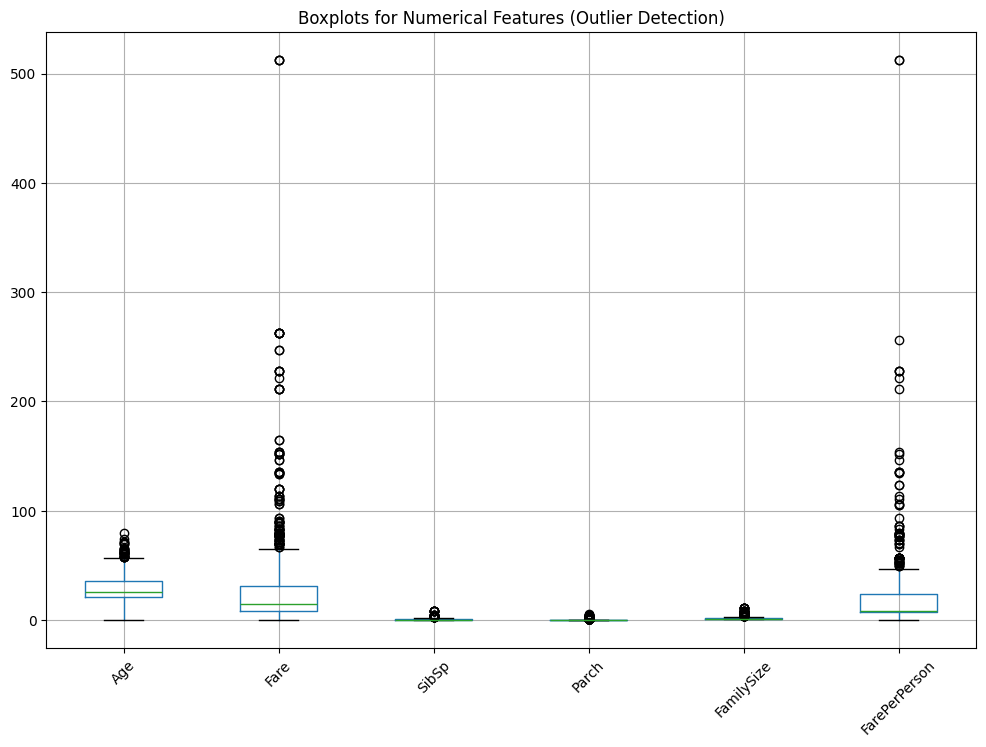

In [37]:
# new column 
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['FarePerPerson'] = data['Fare'] / data['FamilySize']

# Select numerical columns for outlier analysis
num_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'FarePerPerson']
# Draw to know Outliers
plt.figure(figsize=(12, 8))
data[num_cols].boxplot()
plt.title("Boxplots for Numerical Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

In [65]:
# Outlire by Winsorizing , IQR 
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Cap values at upper/lower bounds (Winsorizing)
    df[column] = np.clip(data[column], lower, upper)
    return df

# Apply outlier capping to all numerical columns
for col in num_cols:
    df = cap_outliers(data, col)
# reduces outlier 
print("Outliers capped using IQR method.")

Outliers capped using IQR method.


In [41]:
print("Fare stats after capping:")
print(df['Fare'].describe())

Fare stats after capping:
count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64


In [42]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,FarePerPerson
count,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.893850,0.426487,0.0,24.046813,0.228956,1.664983,15.496058
std,0.486592,0.836071,12.732352,0.708246,0.0,20.481625,0.420397,0.914151,13.494798
min,0.000000,1.000000,0.420000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,21.500000,0.000000,0.0,7.910400,0.000000,1.000000,7.250000
50%,0.000000,3.000000,26.000000,0.000000,0.0,14.454200,0.000000,1.000000,8.300000
75%,1.000000,3.000000,36.000000,1.000000,0.0,31.000000,0.000000,2.000000,23.666667
max,1.000000,3.000000,57.750000,2.500000,0.0,65.634400,1.000000,3.500000,48.291667


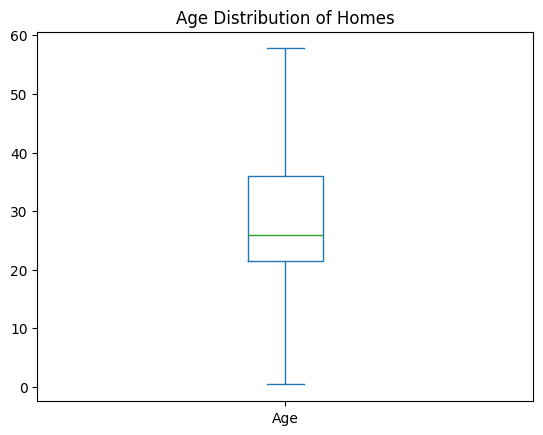

In [44]:
data['Age'].plot(kind='box')
plt.title('Age Distribution of Homes')
plt.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Select features for regression (predicting Fare)
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Sex', 'Embarked']
X = data[features]
y = data['Fare'] 
# One-hot encode
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [52]:
print("Linear Regression Performance (Predicting Fare):")
print(f"MSE:  {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²:   {r2_score(y_test, y_pred):.2f}")

Linear Regression Performance (Predicting Fare):
MSE:  125.44
RMSE: 11.20
R²:   0.70


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# 4. Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Omar_Atif\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [61]:
y_pred = model.predict(X_test)

In [62]:
# Evaluation of the performance
cm = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8156424581005587
Precision:  0.7903225806451613
Recall:  0.7101449275362319
F1 Score:  0.7480916030534351

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [63]:
# Evaluation by Cross-Validation
model = LogisticRegression(max_iter=1000)
# Define KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Apply Cross Validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print("Accuracy for each fold:", scores)
print("Average Accuracy:", np.mean(scores))

Accuracy for each fold: [0.81564246 0.81460674 0.87078652 0.80898876 0.8258427 ]
Average Accuracy: 0.8271734354403366
